**` Beginner: Markowitz Portfolio Optimizer`**

Install the required packages

In [ ]:
!pip install yfinance
!pip install matplotlib

Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import minimize


Declare the companies we want to compare, the start date and the end date of comparisons

In [ ]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2005-01-01'  # or at least 2010
end_date = '2025-01-01'

Downlaod the stock data from Yahoo Finance using yfinance library.
Close prices are the closing price of the stocks of companies on that particular date.

In [ ]:
# Download data (auto_adjust is now True by default)
data = yf.download(tickers, start=start_date, end=end_date)

# Extract just the Close prices
close_prices = data['Close']

# Drop any rows with missing values
close_prices = close_prices.dropna()


/tmp/ipython-input-17-4077704082.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Lets get the daily returns on the closing prices of the stocks.

---


Returns= (CP of current day - CP of last day) / CP of last day

In [ ]:
returns = close_prices.pct_change().dropna()

<Axes: xlabel='Ticker', ylabel='Ticker'>

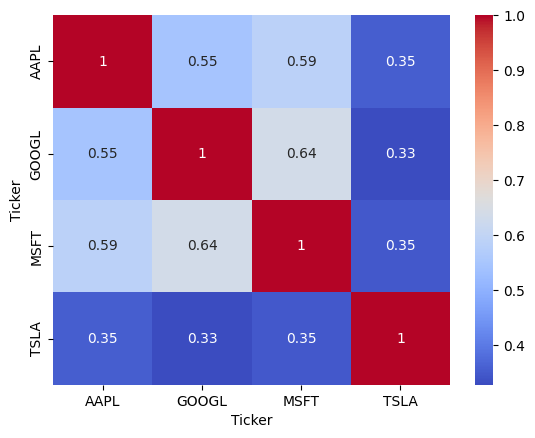

In [ ]:
import seaborn as sns
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')


In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()


In [ ]:
trading_days = 252
annual_returns = mean_returns * trading_days
annual_cov_matrix = cov_matrix * trading_days


In [ ]:
print("🔹 Mean Daily Returns (%):\n")
print((mean_returns * 100).round(2))  # multiply by 100 for percentage

print("\n🔹 Covariance Matrix:\n")
print((cov_matrix).round(6))  # rounding for clean display

🔹 Mean Daily Returns (%):

Ticker
AAPL     0.11
GOOGL    0.09
MSFT     0.10
TSLA     0.22
dtype: float64

🔹 Covariance Matrix:

Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.000305  0.000164  0.000165  0.000224
GOOGL   0.000164  0.000296  0.000177  0.000204
MSFT    0.000165  0.000177  0.000260  0.000203
TSLA    0.000224  0.000204  0.000203  0.001306


In [ ]:
print("🔹 Annual mean Returns (%):\n")
print((annual_returns * 100).round(2))  # multiply by 100 for percentage

print("\n🔹Annual Covariance Matrix:\n")
print((annual_cov_matrix).round(6))  # rounding for clean display

🔹 Annual mean Returns (%):

Ticker
AAPL     27.87
GOOGL    23.16
MSFT     25.17
TSLA     54.59
dtype: float64

🔹Annual Covariance Matrix:

Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.076858  0.041328  0.041695  0.056467
GOOGL   0.041328  0.074639  0.044581  0.051503
MSFT    0.041695  0.044581  0.065636  0.051031
TSLA    0.056467  0.051503  0.051031  0.329216


The oneself covariance of Tesla is higher than others, which means Tesla stocks are highly volatile.

In [ ]:
correlation_matrix = returns.corr()
print(correlation_matrix)


Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    1.000000  0.545652  0.587038  0.354982
GOOGL   0.545652  1.000000  0.636939  0.328558
MSFT    0.587038  0.636939  1.000000  0.347153
TSLA    0.354982  0.328558  0.347153  1.000000


See, all the stocks are weakly or mildly affected by each other and move in the same direction. Tesla's stocks are volatile bu they are not dragging others with it . This shows that **Correlation =! Causation**

In [ ]:
num_assets = len(mean_returns)  #Number of different stocks (companies) you're investing in.
print(num_assets)
num_portfolios = 10000 #How many random portfolios you're generating to test.
risk_free_rate = 6.353/100  # approx 10-year Indian bond yield


4


IF US STOCKS

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

us_risk_free_rate = web.DataReader('GS5', 'fred', start_date, end_date)
print(us_risk_free_rate.tail())


             GS5
DATE            
2024-09-01  3.50
2024-10-01  3.91
2024-11-01  4.23
2024-12-01  4.25
2025-01-01  4.43


In [ ]:
# Arrays to store simulation results
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
# Markowitz Portfolio Optimizer method
    portfolio_return = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / volatility

    results[0,i] = portfolio_return
    results[1,i] = volatility
    results[2,i] = sharpe_ratio

# Extract the best portfolios


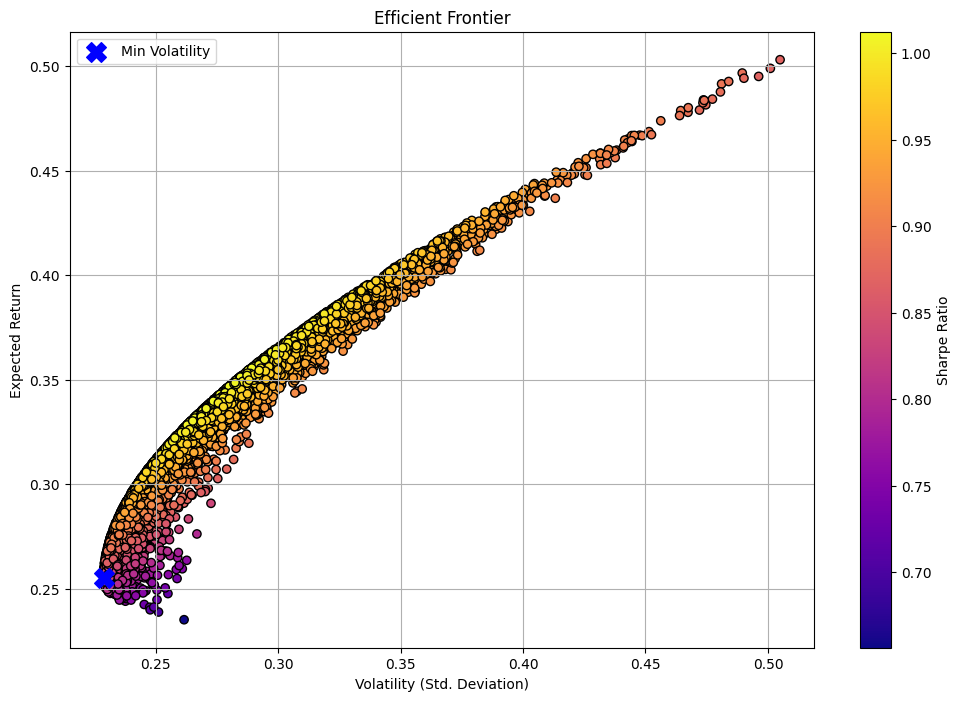

In [ ]:
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])
max_return_idx = np.argmax(results[0])
max_sharpe_allocation = weights_record[max_sharpe_idx]
min_vol_allocation = weights_record[min_vol_idx]
max_return_allocation = weights_record[max_return_idx]


# Plotting
plt.figure(figsize=(12, 8))
# Plot all portfolios with color showing Sharpe Ratio
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='plasma', edgecolors='k')
plt.colorbar(label='Sharpe Ratio')

# Label axes
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Highlight the portfolio with the max Sharpe Ratio


# Highlight the portfolio with the minimum volatility
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx],
            color='b', marker='X', s=200, label='Min Volatility')

# Final touches
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Max Sharpe Index:", max_sharpe_idx)
print("Max Sharpe Value:", results[2, max_sharpe_idx])
print("Return at max sharpe",results[0,max_sharpe_idx])
print("Min Volatility Index:", min_vol_idx)
print("Min Volatility Value:", results[1, min_vol_idx])
print("Return at min vol",results[0,min_vol_idx])

print("Max Return index:", max_return_idx)
print("Max Return Value:", results[0, max_return_idx])
print("Volatility Value:", results[1, max_return_idx])
print("Sharpe Value:", results[2, max_return_idx])



Max Sharpe Index: 249
Max Sharpe Value: 1.0123421680219897
Return at max sharpe 0.3460713280949604
Min Volatility Index: 9508
Min Volatility Value: 0.2288274458498777
Return at min vol 0.2552973510472182
Max Return index: 3169
Max Return Value: 0.5030502254809427
Volatility Value: 0.5049512162428553
Sharpe Value: 0.8704211641497588


In [ ]:
print("Portfolio with Maximum Sharpe Ratio:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {max_sharpe_allocation[i]:.2%}")

print("\nPortfolio with Minimum Volatility:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {min_vol_allocation[i]:.2%}")

print("\nPortfolio with Max return:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {max_return_allocation [i]:.2%}")

Portfolio with Maximum Sharpe Ratio:
AAPL: 38.07%
GOOGL: 3.24%
MSFT: 29.88%
TSLA: 28.80%

Portfolio with Minimum Volatility:
AAPL: 31.68%
GOOGL: 31.68%
MSFT: 36.16%
TSLA: 0.48%

Portfolio with Max return:
AAPL: 3.30%
GOOGL: 5.91%
MSFT: 5.25%
TSLA: 85.54%


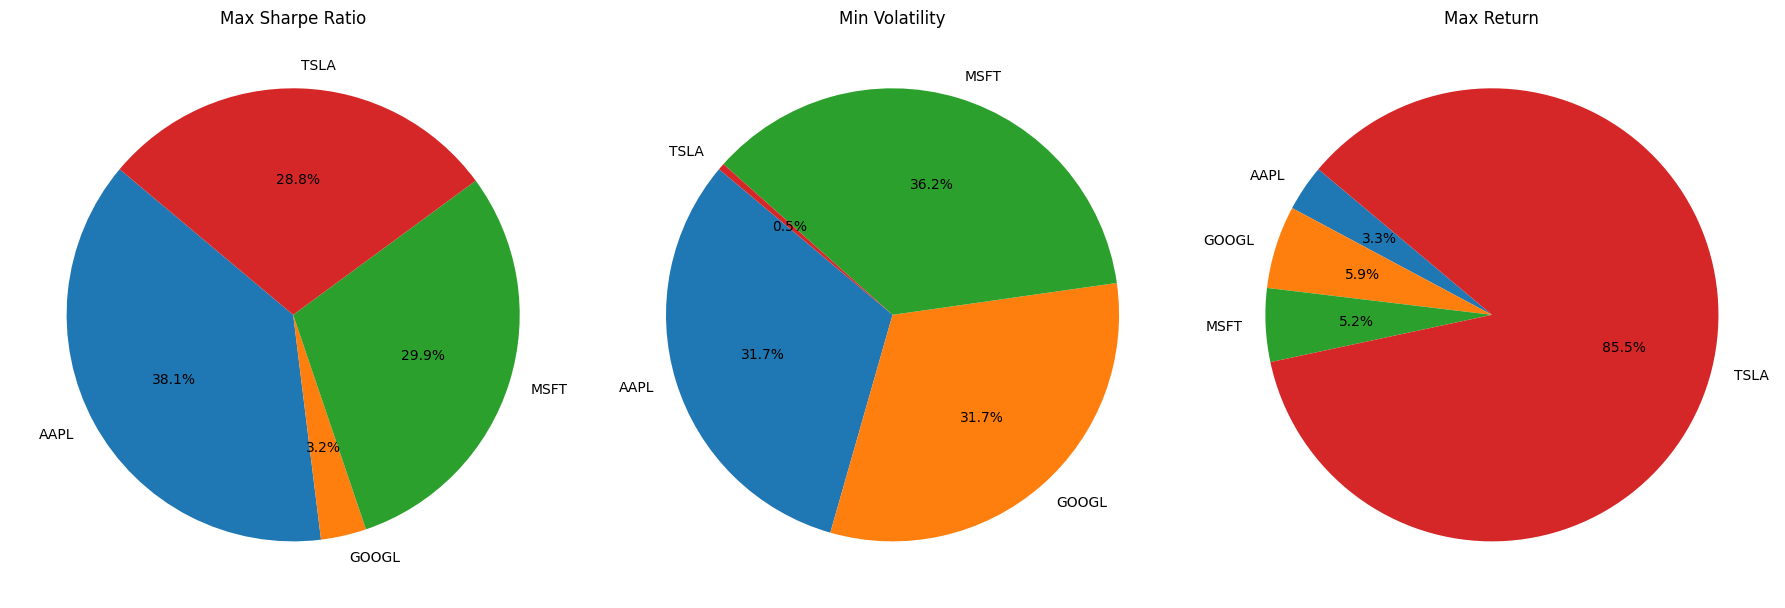

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Max Sharpe Ratio Portfolio
axs[0].pie(max_sharpe_allocation, labels=tickers, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Max Sharpe Ratio')

# Min Volatility Portfolio
axs[1].pie(min_vol_allocation, labels=tickers, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Min Volatility')

# Max Return Portfolio
axs[2].pie(max_return_allocation, labels=tickers, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Max Return')

plt.tight_layout()
plt.show()


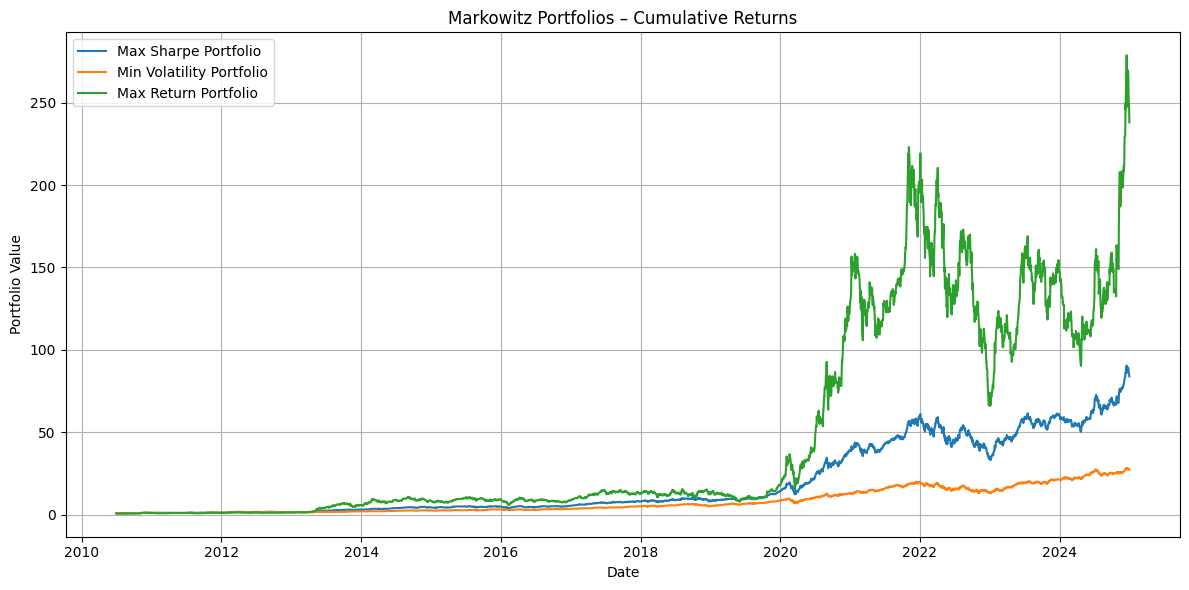

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Portfolio weights (use your actual weights)
w_sharpe = np.array([0.3821, 0.0382, 0.2966, 0.2831])
w_minvol = np.array([0.3058, 0.3054, 0.3867, 0.0021])
w_maxret = np.array([0.0169, 0.0588, 0.0299, 0.8944])

# Helper to compute cumulative returns
def get_cumulative(weights):
    daily_portfolio_returns = (returns * weights).sum(axis=1)
    return (1 + daily_portfolio_returns).cumprod()

# Calculate cumulative returns
cum_sharpe = get_cumulative(w_sharpe)
cum_minvol = get_cumulative(w_minvol)
cum_maxret = get_cumulative(w_maxret)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cum_sharpe, label='Max Sharpe Portfolio')
plt.plot(cum_minvol, label='Min Volatility Portfolio')
plt.plot(cum_maxret, label='Max Return Portfolio')

plt.title('Markowitz Portfolios – Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
